# Boosting

## Part 1: AdaBoost

First we visualize our data, this time creating a scatter plot comparing the bill length and bill depth measurements of the Chinstrap and Gentoo species.

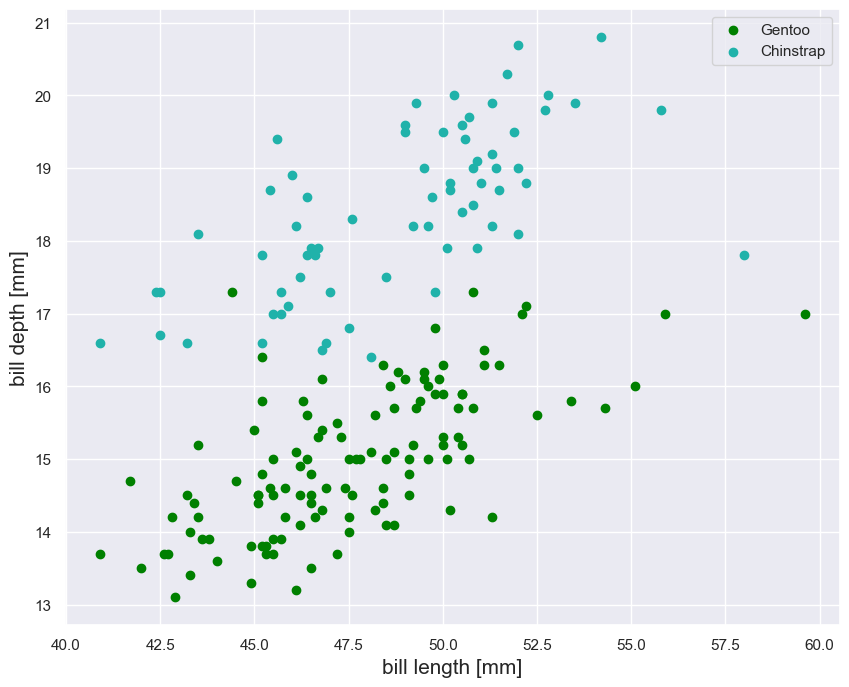

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor

sns.set_theme()

# Import the data
penguins = sns.load_dataset("penguins")
penguins = penguins.iloc[152:].dropna()

X = penguins[["bill_length_mm", "bill_depth_mm"]].dropna().to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
    
# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

# Plot the data
pengs = ["Gentoo", "Chinstrap"]
colors = ["green", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(pengs, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm, temp_df.bill_depth_mm, c = color,label = species)
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()


Now, we divide our data and train an AdaBoost model using Decision Tree learners, with a max depth of 2. As shown below, this acheives a 96% accuracy, despite the trees being very shallow.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 19)

# import the learner we will be using, decision tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=13), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)


dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)
print(f"AdaBoost Classification Report, Decision Tree")
print(classification_report(y_test, dt_y_pred), "\n")

AdaBoost Classification Report, Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.98      0.96      0.97        47

    accuracy                           0.96        75
   macro avg       0.95      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75
 



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Additonally, we will use the ```SGDClassifier``` method to mimic a perceptron with a learning rate of 0.2. This leads to a highly variable accuracy. Running the code block below multiple times will reveal that the perceptron AdaBoost model can have an accuracy up to 95%, or perform worse than random guessing. This can be due to the randomness inherent to our model, as well as the fact that AdaBoost works by focusing more and more on misclassified points. If the base learner is unstable (like a perceptron with raw data), early errors get amplified.

In [101]:
from sklearn.linear_model import SGDClassifier

# AdaBoost with perceptron as base estimator
ada_clf = AdaBoostClassifier(SGDClassifier(loss="perceptron",  # behaves like Perceptron
                                penalty=None,       # no regularization
                                learning_rate="constant", 
                                eta0=1.0,            # learning rate (default for perceptron)
                                max_iter=1000, 
                                tol=1e-3, 
                                random_state=12),
                             n_estimators=10,
                             algorithm="SAMME", 
                             learning_rate=0.2)

# Fit and predict
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)

# Evaluation
print("AdaBoost with Perceptron Base Classifier")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost with Perceptron Base Classifier
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        47

    accuracy                           0.96        75
   macro avg       0.95      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75
 



Plotting a comparison of the two models reveals how vastly different their decision boundaries are. While the Decison Tree version leads to higher accuracy, perhaps the Perceptron version gives a more elegant solution for this dataset.

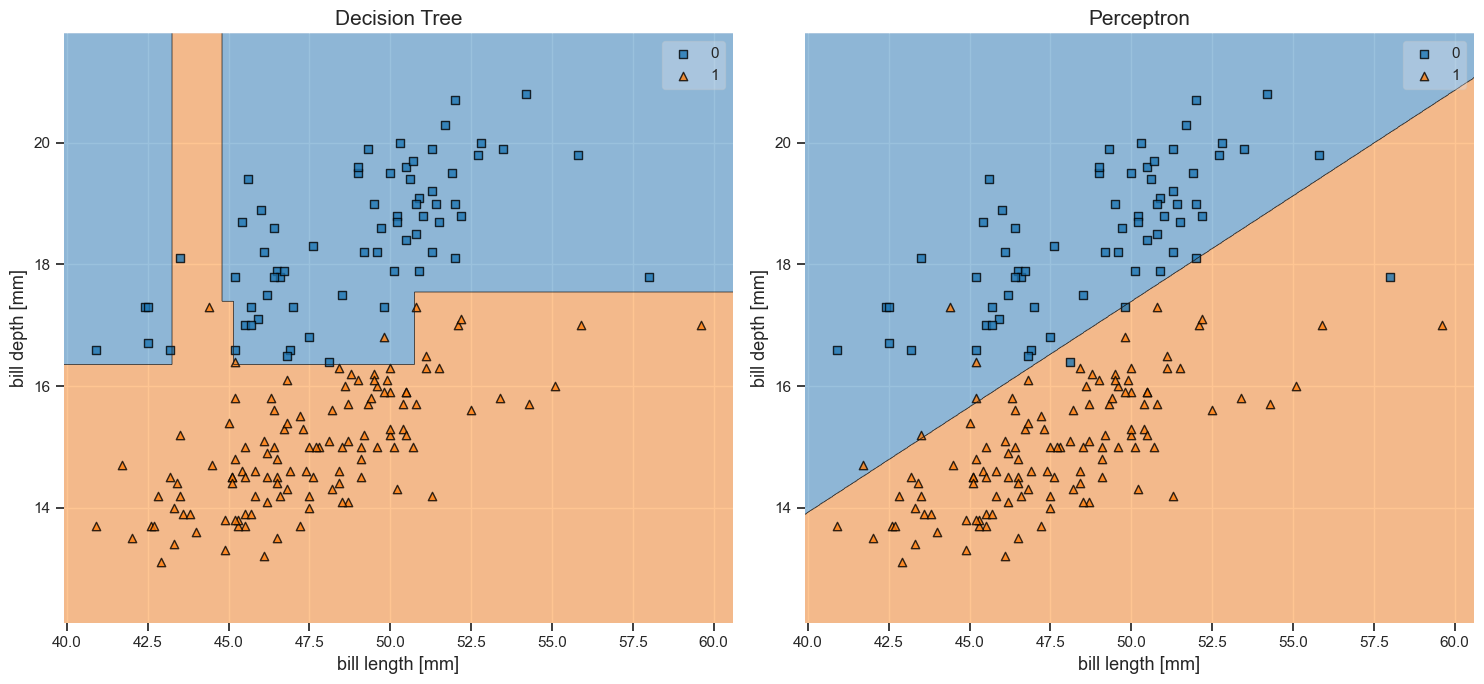

In [102]:
from mlxtend.plotting import plot_decision_regions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot on ax1
plt.sca(ax1)
plot_decision_regions(X, y, clf=dt_clf)
ax1.set_title("Decision Tree", fontsize=15)
ax1.set_xlabel("bill length [mm]", fontsize=13)
ax1.set_ylabel("bill depth [mm]", fontsize=13)

# Plot on ax2
plt.sca(ax2)
plot_decision_regions(X, y, clf=ada_clf)
ax2.set_title("Perceptron", fontsize=15)
ax2.set_xlabel("bill length [mm]", fontsize=13)
ax2.set_ylabel("bill depth [mm]", fontsize=13)

plt.tight_layout()
plt.show()


Now we will introduce more features into our input vector. This does not seem to vastly improve accuracy for this dataset, although this oculd be due to the fact that the data already appears linearly separable, so including more features may not make a large impact.

In [103]:
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].dropna().to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 12)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.93      1.00      0.96        41

    accuracy                           0.96        75
   macro avg       0.97      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75
 



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For the Perceptron, we actually see a drop in accuracy. Additionally, it became necessary to decrease the learning rate, as the previous learning rate seemed to lead to instability (and many errors). 

In [105]:
# AdaBoost with perceptron as base estimator
ada_clf = AdaBoostClassifier(SGDClassifier(loss="perceptron",  # behaves like Perceptron
                                penalty=None,       # no regularization
                                learning_rate='constant', 
                                eta0=1.0,            # learning rate (default for perceptron)
                                max_iter=1000, 
                                tol=1e-3, 
                                random_state=42),
                             n_estimators=10,
                             algorithm="SAMME", 
                             learning_rate=0.1)

# Fit and predict
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)

# Evaluation
print("AdaBoost with Perceptron Base Classifier")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost with Perceptron Base Classifier
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        34
           1       0.80      1.00      0.89        41

    accuracy                           0.87        75
   macro avg       0.90      0.85      0.86        75
weighted avg       0.89      0.87      0.86        75
 



## Part 2: Gradient Boosting

The following code generates and visualizes a synthetic nonlinear dataset over the unit interval (with some added noise).

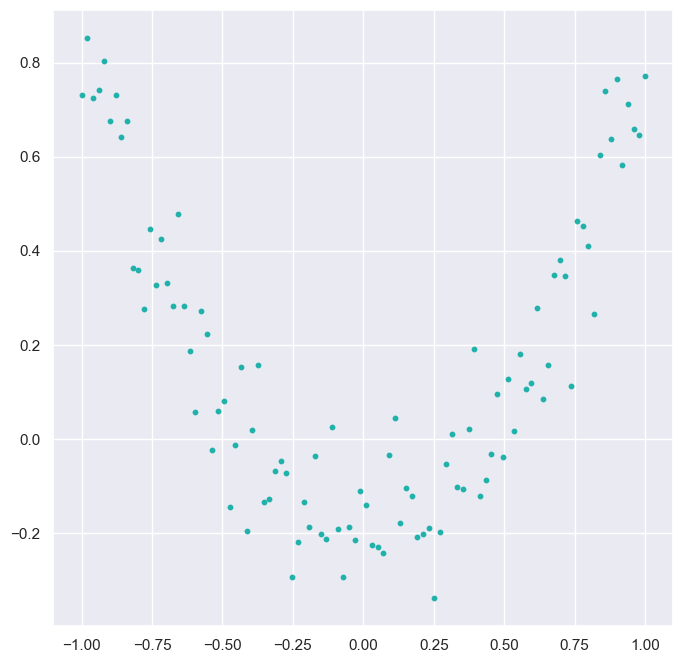

In [135]:
np.random.seed(13)

X = np.linspace(-1, 1, 100)

y = (X ** 2) + np.random.normal(-.19, .11, 100)

plt.figure(figsize=(8, 8))
plt.scatter(X, y, s=10, color = "lightseagreen")
plt.show()

In [138]:
X1 = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 37)

tree1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree1.fit(X_train, y_train)

y2 = y_train - tree1.predict(X_train)

tree2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree2.fit(X_train, y2)

y3 = y2 - tree2.predict(X_train)

tree3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

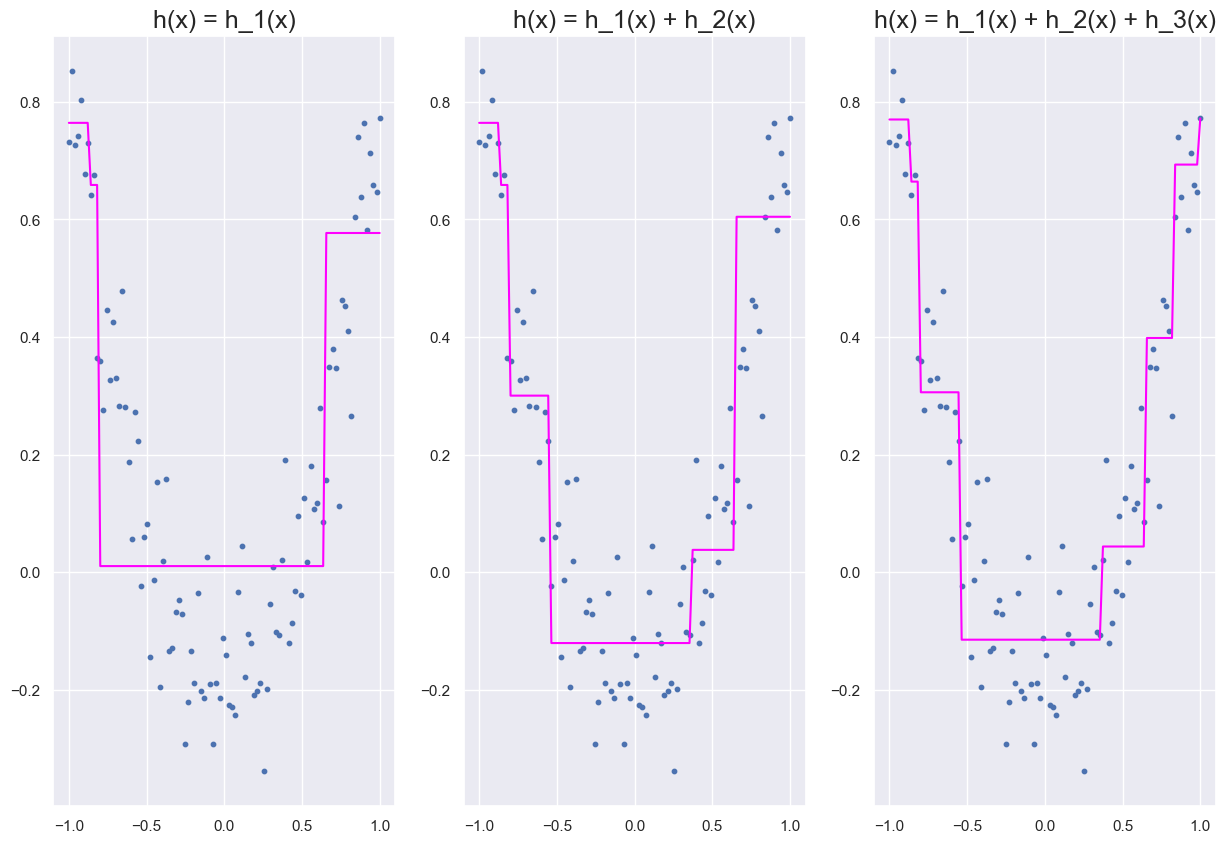

In [141]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X, y, s=10)
ax1.plot(X, tree1.predict(X1), color = "magenta")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter(X, y, s=10)
ax2.plot(X, tree1.predict(X1)+tree2.predict(X1), color = "magenta")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter(X, y, s=10)
ax3.plot(X, tree1.predict(X1)+tree2.predict(X1)+tree3.predict(X1), color = "magenta")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()